<a href="https://colab.research.google.com/github/BubuDavid/Fundamentos-de-Procesamiento-Digital-de-Imagenes/blob/main/tareas/tarea6/Tarea6_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funciones
En la siguiente celda, se podrán encontrar funciones que son útiles al momento de estar trabajando en esta materia, cada función tiene su propia descripción y uso. Ya tengo un documento plantilla para copiar y pegar estas funciones por lo que puede llegar el caso de que no usemos alguna de las funcioens que estén aquí.

In [21]:
# Este script tiene algunas funciones que son útiles tanto en tareas como en apuntes de la clase
# Importando librerías
import cv2 # Para manejar imágenes
import matplotlib.pyplot as plt # Para visualizar las imágenes (Se puede hacer de otra manera con una librería de google pero meh, este está bueno)
import numpy as np # Para operar matrices de manera sencilla

##### Operaciones iniciales con imágenes (Leer, mostrar, mostrar histogramas, etc.) #####
# Desplegar histogramas
# Leer imagen en escala de grises
def read_img(img_name, **kwarg):
	"""Lee imágenes con ayuda de opencv y la muestra

	Args:
		img_name (str): Nombre del path donde se encuentra la imagen

	Returns:
		np.array: Retorna la imagen que se leyó después de mostrarla
	"""
	img = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
	show_img(img, is_gray = True, info = True, **kwarg)
	return img

# Mostrar imágenes
def show_img(img, size = (7, 7), is_gray = True, info = False, **kwargs):
    """Muestra una imagen con tamaño específico.

    Args:
        img (np.array): Imagen que se desea mostrar
        size (tuple, optional): Tamaño relativo de la imagen. Recomendado (7, 7).
        is_gray (bool, optional): Si la imagen es en blanco y negro activar. Recomendado True.
        info (bool, optional): Muestra información de la imagen como el alto, ancho, cantidad de pixeles, etc. Recomendado False.
    """
    if not 'vmin' in kwargs:
        kwargs['vmin'] = 0
    if not 'vmax' in kwargs:
        kwargs['vmax'] = 255

    fig, axs = plt.subplots(figsize=size)
    if is_gray:
        axs.imshow(img, cmap='gray', **kwargs)
    else:
        axs.imshow(img)
    axs.axis("off")

    if info:
        print(f"Imagen de dimensiones: {img.shape}, con un total de {img.size} pixeles")

# Mostrar varias imágenes
def show_imgs_row(imgs, size = (7,7), is_gray = True, info = False, titles = None):
	"""Muestra imágenes en una sola fila (se recomiendan menos de 5 imágenes para mejor visibilidad)

	Args:
		imgs (List[np.array]): Lista de imágenes a desplegar
		size (tuple, optional): Tamaño relativo de cada imagen a desplegar. Recomendado (7,7).
		is_gray (bool, optional): Si es o no blanco y negro. Recomendado True.
		info (bool, optional): Muestra información de la imagen como el alto, ancho, cantidad de pixeles, etc. Recomendado False.
		titles (_type_, optional): Lista de títulos para la imagen. Recomendado None.
	"""
	schema = (1, len(imgs))
	options = {}
	if is_gray:
		options["cmap"] = "gray"
		options["vmin"] = 0
		options["vmax"] = 255

	fig, axs = plt.subplots(*schema, figsize=size)

	for index in range(len(imgs)):
		axs[index].imshow(imgs[index], **options)
		axs[index].axis("off")
		if titles:
			axs[index].set_title(titles[index])

def show_histograms(imgs, bin_value = 20, colors = [None, "g"], titles = ["Normal", "No normal"], normalized = True, edgecolor = "black", cumulative = False, size = (15, 5), **kwargs):
	"""Muestra y regresa histogramas de las imágenes que le pases.

	Args:
		imgs (List[np.array]): Lista de imágenes a calcular sus histograms
		bin_value (int, optional): Rango de los bins en nuestros plots. Recomendado 20.
		colors (list, optional): Lista de colores para los histogramas. Recomendado [None, "g"].
		titles (list, optional): Lista de títulos para los histogramas. Recomendado ["Normal", "No normal"].
		normalized (bool, optional): Dicta si los histogramas están normalizados o no. Recomendado True.
		edgecolor (str, optional): El color del borde de cada bin, también se puede dejar en None si no quieres borde. Recomendado "black".
		cumulative (bool, optional): Esto indica si los histogramas son acumultivos o no. Recomendado False.
		size (tuple, optional): Tamaño de las gráficas. Recomendado (15, 5).

	Returns:
		hist: Lista con los histogramas calculados.
		bins: Lista con los bins calculados aunque usualmente son iguales todos.
	"""
	if type(imgs) != list:
		imgs = [imgs]
	if type(titles) != list:
		titles = [titles]
	
	flattens = np.array(list(map(lambda img: img.ravel(), imgs)))
	bins = np.array([np.linspace(0, 255, bin_value) for i in range(len(imgs))])
	hists = []
	fig, ax = plt.subplots(1, len(imgs), figsize = size)
	
	if len(imgs) == 1:
		img, b = imgs[0], bins[0]
		
		hist, b = np.histogram(img, bins = b)
		if normalized:
			hist = hist / img.size
		if cumulative:
			hist = np.cumsum(hist)
		ax.hist(b[:-1], b, weights = hist, color = colors[0], edgecolor = edgecolor, **kwargs)
		ax.set_title(titles[0])
		return hist, b
	else:
		for index in range(len(flattens)):
			img, b = imgs[index], bins[index]
			hist, b = np.histogram(img, bins = b)
			if normalized:
				hist = hist / img.size
			if cumulative:
				hist = np.cumsum(hist)
			
			ax[index].hist(b[:-1], b, weights = hist, color = colors[index], edgecolor = edgecolor, **kwargs)
			ax[index].set_title(titles[index])
			hists.append(hist)
	return hists, bins

###### Transformaciones generales sobre imágenes ######
# Creditos: http://learnwebgl.brown37.net/08_projections/projections_mapping.html
def img_scale(img, minf, maxf):
    a, b = np.min(img), np.max(img)
    scale = (maxf - minf)/(b - a)
    offset = -a*scale + minf
    rescaled = img*scale + offset
    return rescaled

###### Transformaciones de intensidades de imágenes ######

# Binarize images

# Transformación Negativa
def imcomplement(img):
	"""Función para generar el negativo de una imagen en blanco y negro

	Args:
		img (np.array): Imagen a negativizar

	Returns:
		negative_img: Imagen negativa
	"""
	return np.abs(255 - img)

# Genera imagenes binarias
def binarize(img, max_val):
	"""Genera imágenes binarias a partir de un cierto max_val

	Args:
		img (np.array): Imagen a binarizar
		max_val (int): Límite en el cual se considera 1 o 0

	Returns:
		binarized_img: Imagen binaria obtenida
	"""
	return (img >= max_val) * 255

# Credits: https://www.nzfaruqui.com/contrast-stretching-in-image-processing-using-matlab/
def imadjust(img,lim_in = [0, 1], lim_out = [0, 1], gamma=1, plot = False):
	"""Imagen que ajusta a un rango determinado con una gamma correction definida (Hace lo mismo que la función de matlab)

	Args:
		img (np.array): Imagen a transformar
		lim_in (list, optional): Limites de la imagen de input. Defaults to [0, 1].
		lim_out (list, optional): Limites de la imagen de output. Defaults to [0, 1].
		gamma (int, optional): Factor gamma de la función. Defaults to 1.
		plot (bool, optional): Si se desea graficar le función gamma. Defaults to False.

	Returns:
		adjusted_img: Imagen ajustada
	"""
	c, d = lim_in
	a, b = lim_out
	# Normalización para que esto funcione
	img_cp = img.copy()
	if np.max(img_cp) > 1:
		img_cp = img_cp / np.max(img_cp)

	# Básicamente esto es lo que hace imadjust ☝ ver la fuente para mayor información
	adj = (((img_cp - a) / (b - a)) ** gamma) * (d - c) + c
	# Regresando a las dimensiones originales
	adj = np.int64(adj / np.max(adj) * 255)

	# Grafica la función
	if plot:
		x = np.linspace(0, 1, 1000)
		y = (((x - a) / (b - a)) ** gamma) * (d - c) + c
		plt.plot(x,y, c='g')
		plt.title(f'Función adjust con a={a}, b={b}, c={c}, d={d}, gamma={gamma}')
	return adj

def equalize_img(img):
	"""Función que ecualiza el histograma de una imagen

	Args:
		img (np.array): Imagen a ser ecualizada

	Returns:
		equ_img: Imagen Ecualizada
	"""
	return cv2.equalizeHist(img)
 

def equalize_hist(img):
    bins = 256
    hist, _ = np.histogram(img, bins)
    cdf = np.cumsum(hist)
    mini_no_zero = np.min(cdf[np.nonzero(cdf)])
    transformation_vector = np.round((cdf - mini_no_zero)/(img.size - mini_no_zero) * 255)

    T = lambda p: transformation_vector[p]
    return np.array(list(map(T, img.flatten()))).reshape(img.shape)

# Tarea 6 Código
A partir de esta celda de texto, es donde se encontrarán los enunciados de la tarea junto con las respuestas.

## 1. Hacer una función que se llame Hisma, que reciba una matriz con la imagen I1(suponga que dicha matriz es double con valores entre 0 y 255) y un vector h2 que tiene 256 elementos, el primer elemento se refiere al valor de intensidad 0 y el elemento 256 se refiere a la intensidad 255, suponga que el histograma está normalizado (la suma de los elementos da 1). Lo primero que tiene que hacer la función es identificar que el histograma no tenga 0’s, si los hay usted debe cambiar su valor por 1/tamI1, donde tamI1 es el tamaño en pixeles de la imagen (en las notas de clase dije que sumaran un 1 pero no había pensado en que el histograma estuviera normalizado) . La función deberá aplicar la transformación que lleve de I1 a I2, donde el histograma de I2 sea muy parecido a h2, la imagen I2 deberá tener valores entre 0 y 255. La función regresará la imagen I2 y el vector invH2, que es la transformación que lleva Ieq a I2.

In [22]:
# Para hacer esta función necesitamos importar interp1d
from scipy.interpolate import interp1d
# Función Hisma
def hisma(img, h2):
    # El tamaño en pixeles de la imagen es img.size
    len_img = img.size
    # Suponiendo a h2 un np.array entonces podemos usar la siguiente expresión para reemplazar 0's por 1/tamI1
    h2[h2 == 0] = 1 / len_img
    # Sabemos que h2 es un histograma, por tanto
    cdf_h2 = np.cumsum(h2) # Es el histograma acumulado
    # Ahora hagamos el histogram matching segun https://github.com/antimattercorrade/Histogram_Equalisation_and_Matching/blob/main/Histogram_Equalisation_and_Matching.ipynb
    # Calculemos el histograma acumulado de la img
    hist, _ = np.histogram(img, 256)
    # Normalizando
    hist = hist / img.size
    # Calculando el histograma acumulado
    cdf_img = np.cumsum(hist)
    # Con cdf_img y cdf_h2 podemos aplicar:

    # Inicializar inv_h2
    inv_h2 = np.zeros((256))

    # Match histogram https://github.com/antimattercorrade/Histogram_Equalisation_and_Matching/blob/main/Histogram_Equalisation_and_Matching.ipynb
    for i in range(0,256):
      j = 255

      while (j > 0 and cdf_img[i] < cdf_h2[j]):
          j -= 1

      inv_h2[i] = j

    # Y ahora a transformar nuestra imagen con este vector invH2 de transformacion
    trans_function = lambda p: inv_h2[p]

    img_2 = np.array(list(map(trans_function, img.flatten()))).reshape(img.shape)

    return img_2, inv_h2

## 2. Haga un scripts para que pruebe la función de la pregunta 1 con la imagen Fig0310(a).tif y el histograma que se llama h2Luna y que puede cargarlo del archivo HistLuna.mat (revise los archivos asociados a esta tarea), solo tiene que ejecutar el siguiente comando: load(‘HistLuna.mat’); las comillas son comillas simples, word las cambia por símbolos parecidos así que no copie y pegue,mejor escriba el comando. Una vez hecho el load tendrá en el espacio de trabajo de matlab un vector llamado h2Luna que es el que usará como histograma deseado.

Imagen de dimensiones: (1000, 683), con un total de 683000 pixeles


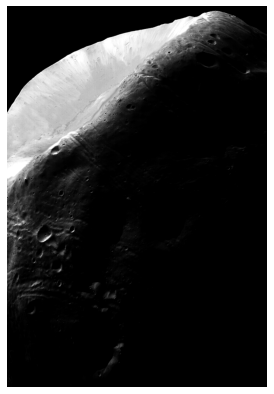

In [23]:
# Leyendo imagen
img = read_img("Fig0310(a).tif")

In [24]:
# Para leer este archivo se necesita importar scipy.io
from scipy.io import loadmat
# Leer el histograma
hist_luna_file = loadmat('HistLuna.mat')
hist_luna = np.array(hist_luna_file['h2Luna'][0]) # Está aquí
assert abs(np.sum(hist_luna) - 1) < 0.00001 # Asegurandonos de que este normalizada

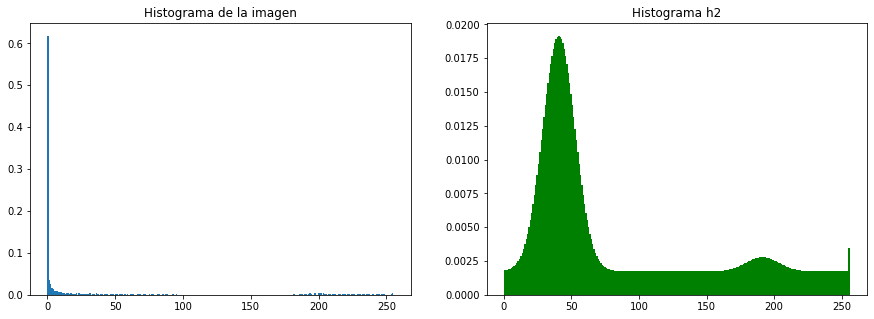

In [25]:
# Veamos los histogramas en una grafica
bins_luna = np.linspace(0, 256, 256)
hist, bins = np.histogram(img, 256)
hist = hist / img.size

# Histogramas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.hist(bins[:-1], bins, weights = hist)
ax2.hist(bins_luna, bins_luna, weights = hist_luna, color = 'g')
ax1.set_title('Histograma de la imagen')
ax2.set_title('Histograma h2')
plt.show()

In [26]:
# Apliquemos nuestra funcion
img2, inv_h2 = hisma(img, hist_luna)

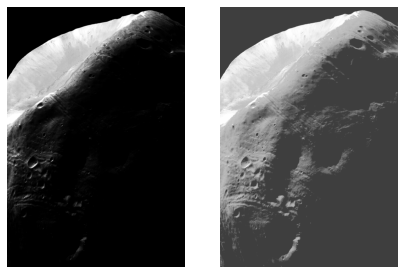

In [27]:
# Comparemos imagenes
show_imgs_row(
    [img, img2]
)

## 3. En el mismo script de la pregunta 2 ahora verifique los resultados obtenidos calculando el histograma de la imagen I2 resultante y comparandolo cuantitiativamente con el histograma h2Luna. Repita la comparación pero con los histogramas acumulados correspondientes.

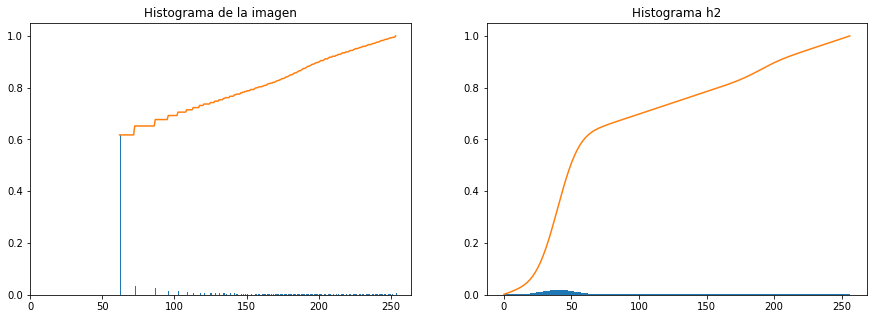

In [28]:
# Comparemos histogramas
# Veamos los histogramas en una grafica
bins_luna = np.linspace(0, 256, 256)
hist2, bins = np.histogram(img2, 256)
hist2 = hist2 / img.size # Histograma de la imagen I2 normalizado
cdf_hist2 = np.cumsum(hist2) # Histograma acumulado de hist2
cdf_luna = np.cumsum(hist_luna)

# Histogramas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.hist(bins[:-1], bins, weights = hist2)
ax1.plot(bins[:-1], cdf_hist2)
ax2.hist(bins_luna, bins_luna, weights = hist_luna,)
ax2.plot(bins_luna, cdf_luna)
ax1.set_title('Histograma de la imagen')
ax1.set_xticks(range(0, 256, 50))
ax2.set_title('Histograma h2')
plt.show()

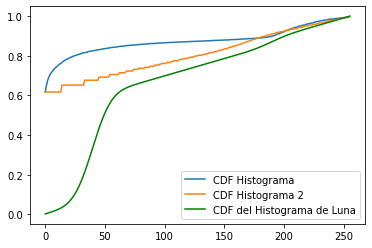

In [57]:
# Grafiquemos los acumulados juntos
cdf_hist = np.cumsum(hist)
plt.plot(cdf_hist, color = None)
plt.plot(cdf_hist2, color = None)
plt.plot(cdf_luna, color = "g")
plt.legend(["CDF Histograma", "CDF Histograma 2", "CDF del Histograma de Luna"])
plt.show()

## 4. En el mismo script de la pregunta 2 ahora verifique sus resultados con la imagen obtenida del siguiente comando Imatlab=histeq(I1,h2Luna) donde I1 es la imagen original obtenida de la lectura del archivo Fig0310(a).tif. Compare la imagen obtenida con la obtenida de la función de la pregunta 1 y también compare los histogramas h2Luna, el histograma de su imagen I2 y el histograma de la imagen Imatlab, repita la misma comparación pero para los histogramas acumulados.

En Python no existe esa función, pero existe otro módulo llamado skimage que es para hacer cosas con imágenes y analizar estas. Entre una de sus funciones es para hacer histogram matching, lo malo es que solo funciona con una imagen de referencia, no con un histograma como en nuestro caso.

Por esta razón copiaré y pegaré los resultados que me salieron de matlab directamente en formato de screen shots.


*Por referencia, aquí está el código del histogram matching de skimage*



```
from skimage.exposure import match_histograms

matched = match_histograms(img, img_reference, channel_axis = 1)
```



## Respuesta:
La imagen que resultó de matlab es la siguiente:

Imagen de dimensiones: (662, 452), con un total de 299224 pixeles


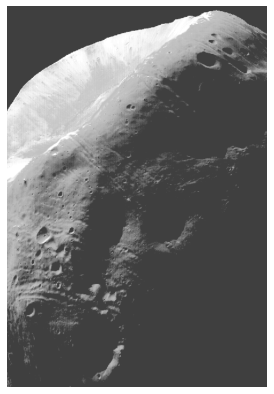

In [40]:
img_matlab = read_img("img_out_matlab.png")

### Comparación entre la imagen generada con el algoritmo que hice y el resultado de matlab

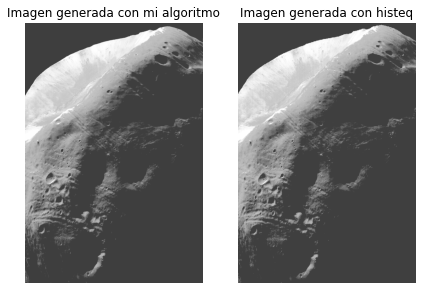

In [44]:
show_imgs_row(
    [img2, img_matlab],
    titles = [
        "Imagen generada con mi algoritmo",
        "Imagen generada con histeq",
    ]
)

### Comparación de histogramas

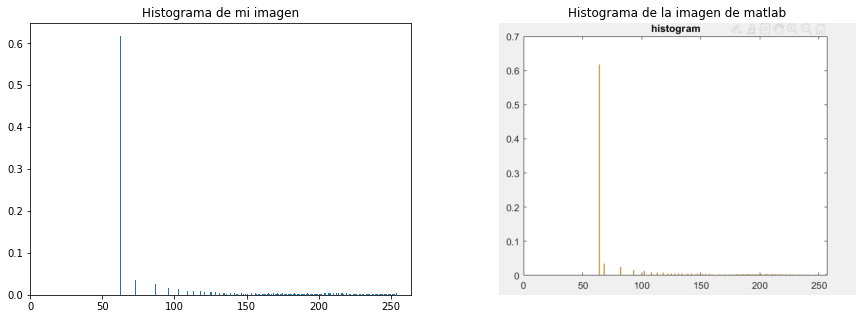

In [55]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))
ax1.hist(bins[:-1], bins, weights = hist2)
ax1.set_xticks(range(0, 256, 50))
ax1.set_title("Histograma de mi imagen")
ax2.imshow(cv2.imread("histograma_matlab.png"))
ax2.set_title("Histograma de la imagen de matlab")
ax2.axis("off")
plt.show()

### Comparación de histogramas acumulados

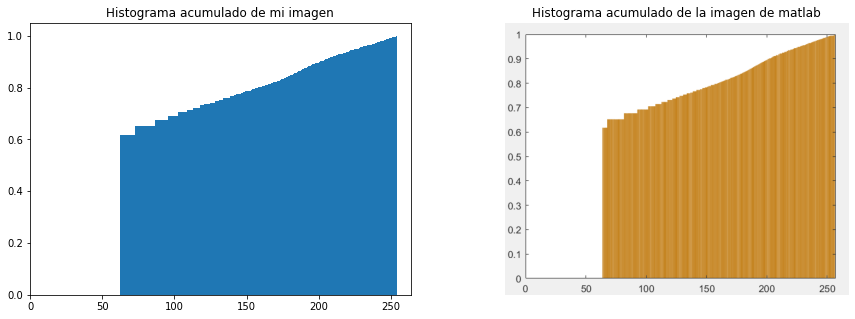

In [56]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))
ax1.hist(bins[:-1], bins, weights = cdf_hist2)
ax1.set_xticks(range(0, 256, 50))
ax1.set_title("Histograma acumulado de mi imagen")
ax2.imshow(cv2.imread("histograma_matlab_acumulado.png"))
ax2.set_title("Histograma acumulado de la imagen de matlab")
ax2.axis("off")
plt.show()

## 5. Ahora cambiemos de estrategia y probemos con la técnica de histograma adaptativo que se discute en el libro de Gonzalez y que matlab tiene una implementación con la función adapthisteq. Haga las imágenes propuesta s en la Figura 3.12 de la página 109 del libro, use los parámetros indicados en el libro. ¿Cual de todas las imágenes le parece la mejor transformación de la figura de la luna?

In [59]:
# Afortunadamente OpenCV tiene una función para hacer esto
clahe1 = cv2.createCLAHE() # Parametros defualt
cl1 = clahe1.apply(img)
clahe2 = cv2.createCLAHE(tileGridSize=(25,25)) # Numtiles = 25, 25
cl2 = clahe2.apply(img)
clahe3 = cv2.createCLAHE(clipLimit = 0.05, tileGridSize=(25,25)) # Cliplimit = 0.05 
cl3 = clahe3.apply(img)

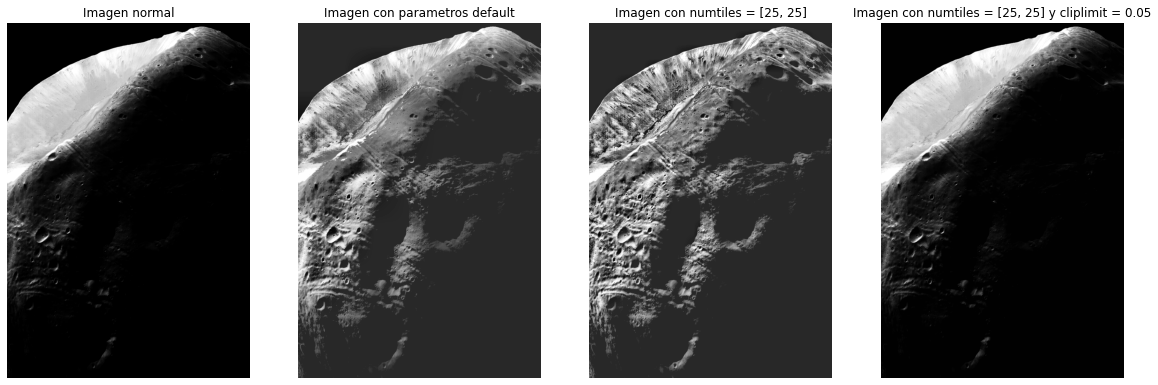

In [63]:
show_imgs_row(
    [img, cl1, cl2, cl3],
    size = (20, 20),
    titles = [
        "Imagen normal",
        "Imagen con parametros default",
        "Imagen con numtiles = [25, 25]",
        "Imagen con numtiles = [25, 25] y cliplimit = 0.05",
    ]
)

La imagen que me parece mejor es la 3era, cono numtiles = [25, 25].